In [111]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

from classification import hyperparameter_search, plot_hyperparameter_search_results
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from copy import deepcopy

np.random.seed(0)

# TCGA

In [112]:
csv_file = 'data/TCGA_labels.csv'
df = pd.read_csv(csv_file)
df.head()

,Variant_Classification,ABCB9..ENSG00023457,ABLIM1..ENSG0003983,ACTA2..ENSG00059,ACTB..ENSG00060,ADORA2B..ENSG000136,ADRB2..ENSG000154,AEBP2..ENSG000121536,AEN..ENSG00064782,AGAP1..ENSG000116987,...,ZCCHC2..ENSG00054877,ZDHHC14..ENSG00079683,ZFP36L1..ENSG000677,ZMAT3..ENSG00064393,ZMIZ1..ENSG00057178,ZMIZ2..ENSG00083637,ZMYND8..ENSG00023613,ZNF561..ENSG00093134,is_true,mutation
0,A129Vfs*20_TCGA-66-2785_Frame_Shift_Ins_17:g.7...,376.831000,1358.86000,2471.580000,143602.00000,159.674000,63.136500,946.639000,626.477000,344.195000,...,323.344000,75.356400,8558.040000,43.991900,1783.300000,5320.570000,1018.330000,821.181000,True,Frame_Shift_Ins
1,A138_P142del_TCGA-25-2393_In_Frame_Del_17:g.75...,198.244448,5367.62179,2528.570328,77726.97678,19.656121,2.579692,2130.976296,732.991931,386.605718,...,228.638412,322.247574,6446.509718,36.542642,3207.438557,3213.116903,1688.261865,1149.407697,True,In_Frame_Del
2,A138Cfs*27_TCGA-55-6980_Frame_Shift_Del_17:g.7...,117.516000,1936.34000,14533.700000,185841.00000,95.490700,191.866000,766.578000,256.410000,239.611000,...,230.672000,121.132000,12726.800000,74.270600,2496.910000,4005.300000,923.961000,391.689000,True,Frame_Shift_Del
3,A138Cfs*27_TCGA-55-6980_Frame_Shift_Del_17:g.7...,60.747000,5667.60000,3560.420000,107645.00000,86.834700,1047.620000,698.413000,186.741000,262.372000,...,638.609000,343.604000,8024.280000,78.431400,3746.030000,2692.810000,1168.070000,670.402000,True,Frame_Shift_Del
4,A138Cfs*27_TCGA-D8-A13Y_Frame_Shift_Del_17:g.7...,327.477000,1096.61000,3430.480000,64166.60000,51.837300,9.491300,706.010000,1617.540000,821.366000,...,806.811000,124.118000,1350.690000,237.649000,1885.860000,2283.400000,1967.630000,480.043000,True,Frame_Shift_Del


In [113]:
from classification import log_and_normalize
from copy import deepcopy

df = log_and_normalize(df)
df_full = df

## True vs False

In [114]:
df = deepcopy(df_full)
df = df.drop(columns=['is_true', 'mutation', 'Variant_Classification'])
y = df_full['is_true']

In [115]:
(y == 0).sum() / len(y)

0.5509380194728093

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/home/dario/PycharmProjects/ML-lab/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dario/PycharmProjects/ML-lab/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dario/PycharmProjects/ML-lab/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dario/PycharmProjects/ML-lab/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dario/PycharmProjects/ML-lab/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warni

Validation Score with best hyperparameters: 0.5653206650831354
Test accuracy of best model: 0.55
param_penalty
l2    0.537803
Name: mean_test_score, dtype: float64
param_C
0.1     0.538743
1.0     0.536220
10.0    0.536517
Name: mean_test_score, dtype: float64


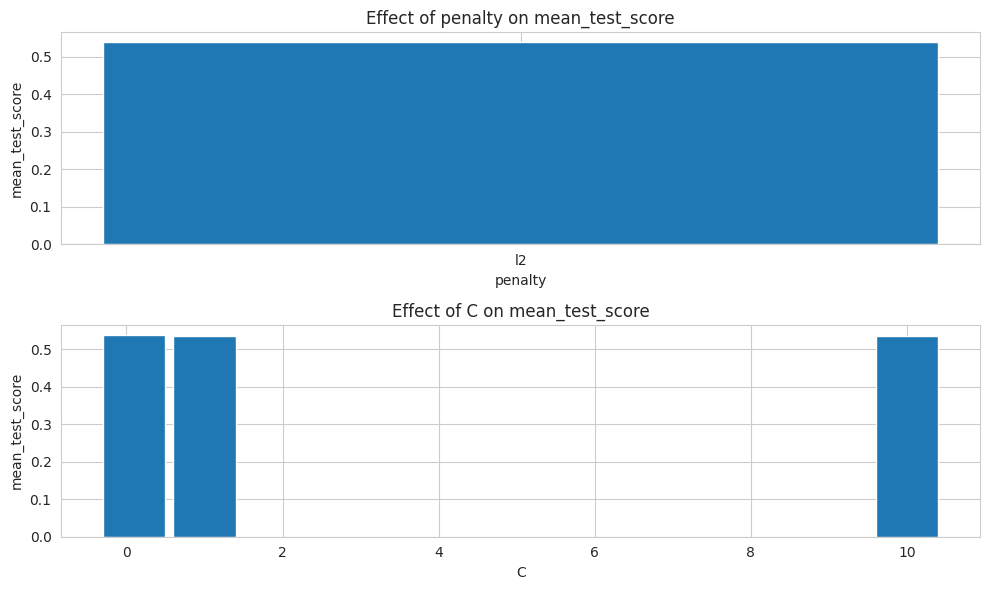

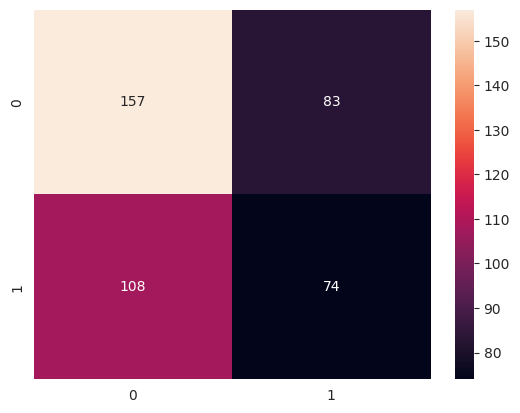

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
param_grid = {
    "penalty": [None, 'l2'],
    "C": [0.1, 1, 10],

}
best_model, best_params, best_score, all_results = hyperparameter_search(model, X_train, y_train, X_val, y_val,
                                                                         param_grid, search_type='grid', cv=3,
                                                                         verbose=2)

y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"Test accuracy of best model: {accuracy_score(y_test, y_pred):.2f}")

plot_hyperparameter_search_results(all_results, param_grid)
plt.show()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()



Fitting 3 folds for each of 12 candidates, totalling 36 fits
Validation Score with best hyperparameters: 0.5558194774346793
Test accuracy of best model: 0.53
param_n_neighbors
3     0.524043
5     0.519664
10    0.529612
Name: mean_test_score, dtype: float64
param_weights
distance    0.521717
uniform     0.527162
Name: mean_test_score, dtype: float64
param_p
1    0.519442
2    0.529438
Name: mean_test_score, dtype: float64


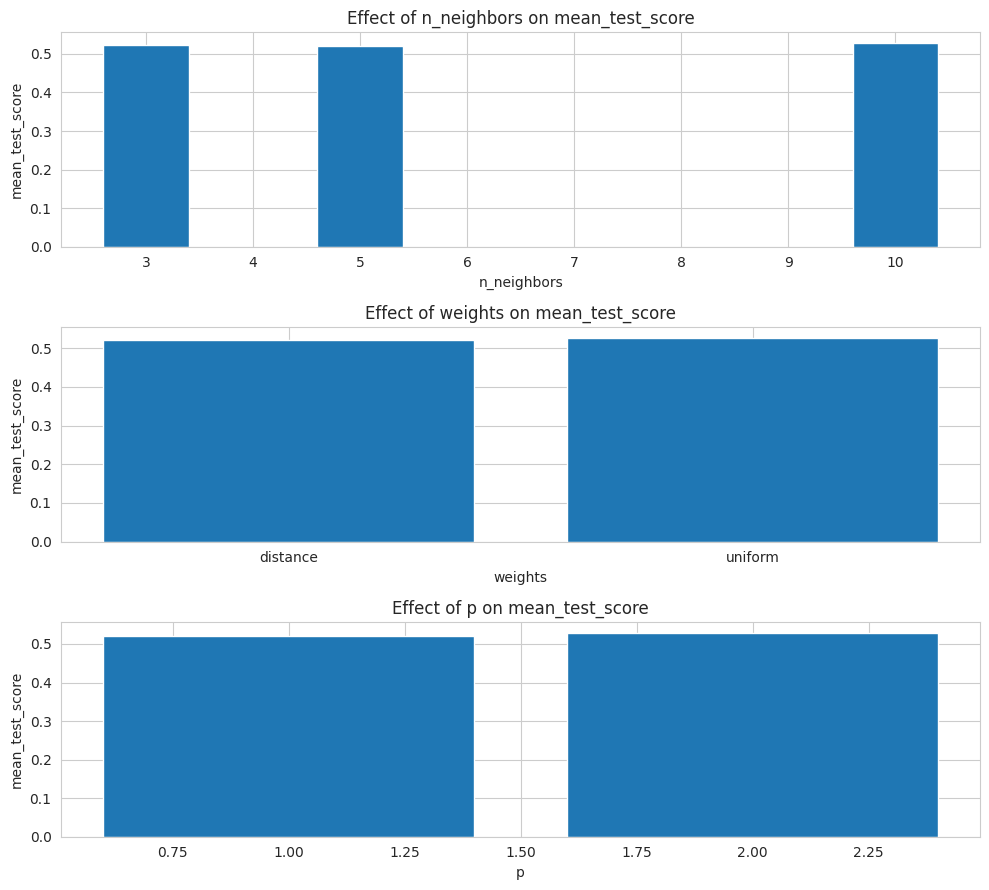

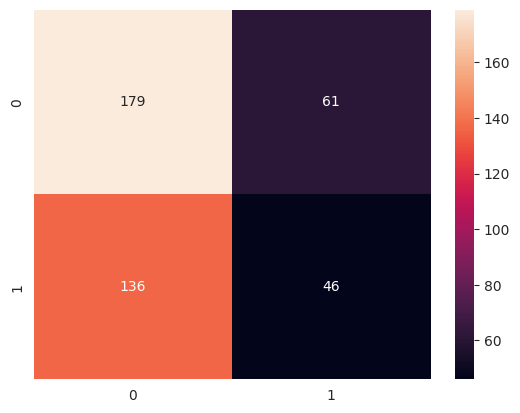

In [10]:
# knn
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
best_model, best_params, best_score, all_results = hyperparameter_search(model, X_train, y_train, X_val, y_val,
                                                                         param_grid, search_type='grid', cv=3,
                                                                         verbose=2)

y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"Test accuracy of best model: {accuracy_score(y_test, y_pred):.2f}")

plot_hyperparameter_search_results(all_results, param_grid)
plt.show()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()



Fitting 3 folds for each of 18 candidates, totalling 54 fits
Validation Score with best hyperparameters: 0.5510688836104513
Test accuracy of best model: 0.57
param_C
0.1     0.547506
1.0     0.540380
10.0    0.516573
Name: mean_test_score, dtype: float64
param_gamma
auto     0.534836
scale    0.534803
Name: mean_test_score, dtype: float64
param_kernel
poly       0.538745
rbf        0.535826
sigmoid    0.529889
Name: mean_test_score, dtype: float64


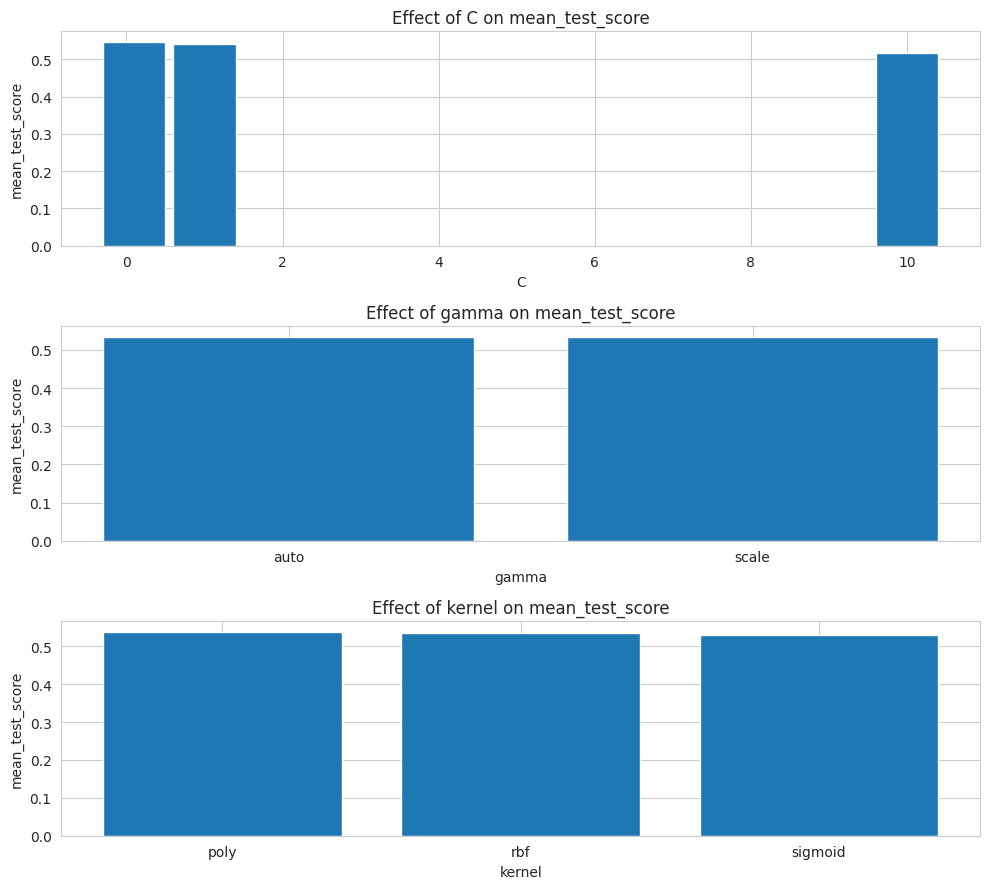

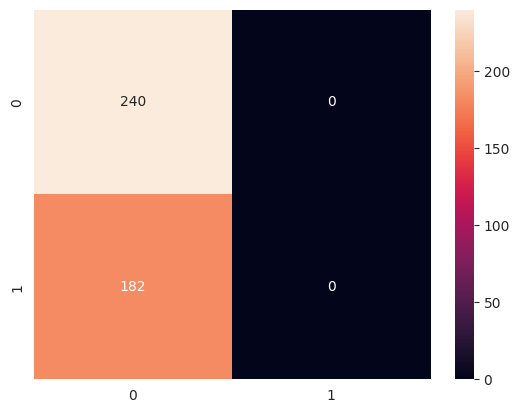

In [12]:
# rbf svm
from sklearn.svm import SVC

model = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    "kernel": ['rbf', 'poly', 'sigmoid']
}
best_model, best_params, best_score, all_results = hyperparameter_search(model, X_train, y_train, X_val, y_val,
                                                                         param_grid, search_type='grid', cv=3,
                                                                         verbose=2)

y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"Test accuracy of best model: {accuracy_score(y_test, y_pred):.2f}")

plot_hyperparameter_search_results(all_results, param_grid)
plt.show()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()



In [7]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
best_model, best_params, best_score, all_results = hyperparameter_search(model, X_train, y_train, X_val, y_val,
                                                                         param_grid, search_type='grid', cv=3,
                                                                         verbose=2)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Validation Score with best hyperparameters: 0.5581947743467933


In [8]:
best_score

0.5436466175557894

In [9]:

y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"Test accuracy of best model: {accuracy_score(y_test, y_pred):.2f}")

Test accuracy of best model: 0.52


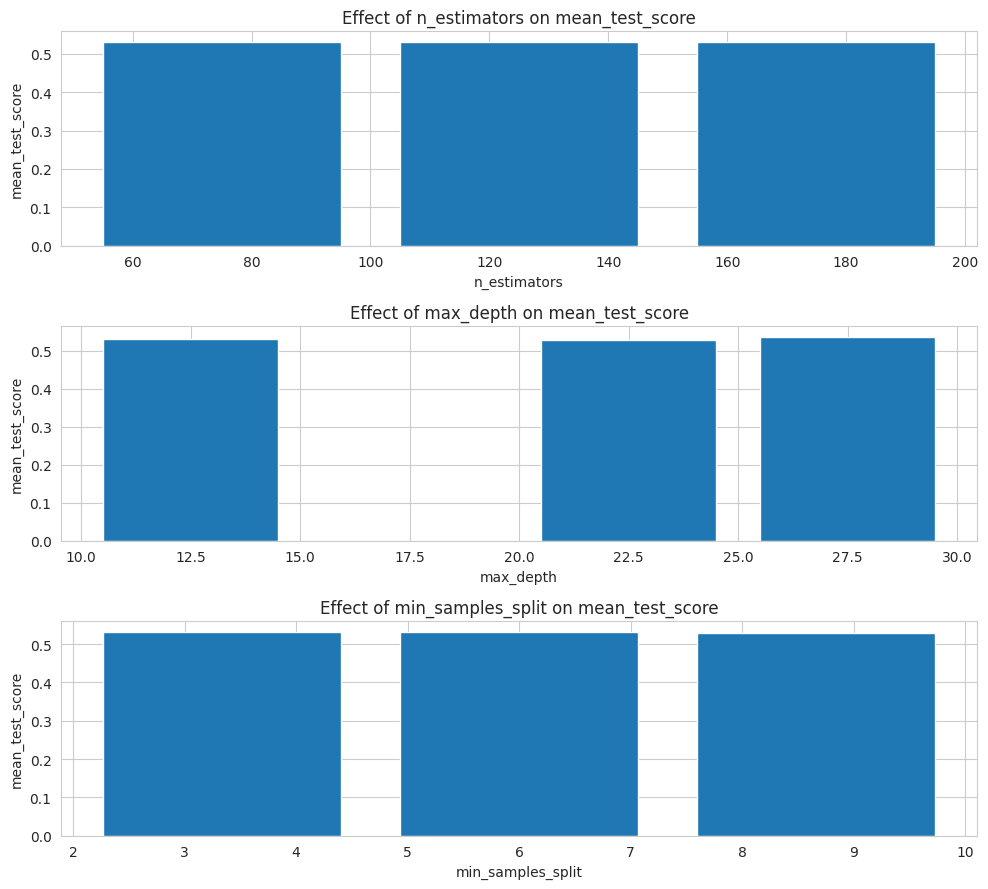

In [10]:
plot_hyperparameter_search_results(all_results, param_grid)
plt.show()

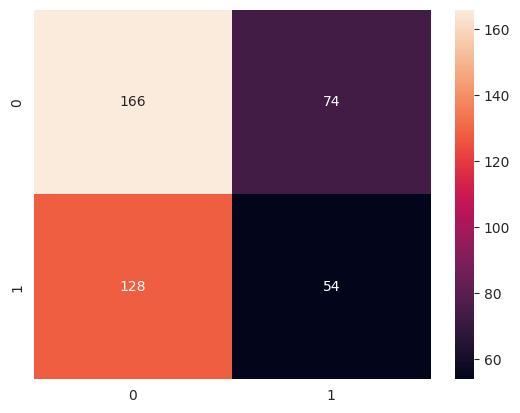

In [12]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [48]:
all_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.057071,0.007509,0.009050,0.000990,0.1,None,"{'C': 0.1, 'penalty': None}",0.595142,0.573171,0.581301,0.583204,0.009070,3,0.961382,0.963489,0.963489,0.962787,0.000993
1,0.065534,0.015821,0.009886,0.002737,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.607287,0.585366,0.605691,0.599448,0.009979,1,0.955285,0.961460,0.955375,0.957373,0.002890
2,0.044143,0.004412,0.007987,0.000666,1.0,None,"{'C': 1, 'penalty': None}",0.595142,0.573171,0.581301,0.583204,0.009070,3,0.961382,0.963489,0.963489,0.962787,0.000993
3,0.097420,0.026375,0.009561,0.001650,1.0,l2,"{'C': 1, 'penalty': 'l2'}",0.587045,0.577236,0.597561,0.587280,0.008299,2,0.961382,0.963489,0.963489,0.962787,0.000993
4,0.054598,0.018021,0.007731,0.000354,10.0,None,"{'C': 10, 'penalty': None}",0.595142,0.573171,0.581301,0.583204,0.009070,3,0.961382,0.963489,0.963489,0.962787,0.000993
5,0.137576,0.014590,0.008128,0.001957,10.0,l2,"{'C': 10, 'penalty': 'l2'}",0.578947,0.569106,0.593496,0.580516,0.010019,6,0.961382,0.963489,0.963489,0.962787,0.000993


### Feature Selection

In [117]:
# load good_genes_tf.txt
import json
with open('good_genes_tf.txt') as f:
    ordered_genes = json.load(f)

In [118]:
N = 100
good_genes = ordered_genes[:N]

In [119]:
X_train_good = X_train[good_genes]
X_val_good = X_val[good_genes]
X_test_good = X_test[good_genes]

In [120]:
model = RandomForestClassifier(n_estimators=200, max_depth=3)
model.fit(X_train_good, y_train)
model.score(X_val_good, y_val)

0.5724465558194775

In [121]:
model.score(X_train_good, y_train)

0.5810570071258907

In [122]:
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.5605700712589073

In [138]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000, penalty='l2', C=0.002)
model.fit(X_train_good, y_train)
model.score(X_val_good, y_val)

0.5700712589073634

## Mutation prediction

In [96]:
df = deepcopy(df_full)
df = df.drop(columns=['is_true', 'mutation', 'Variant_Classification'])
y = df_full['mutation']

In [97]:
y.value_counts() / len(y)

mutation
Missense_Mutation         0.642840
Nonsense_Mutation         0.129898
Frame_Shift_Del           0.093090
Splice_Site               0.066018
Frame_Shift_Ins           0.028734
In_Frame_Del              0.018048
Splice_Region             0.011874
Fusion_                   0.005937
In_Frame_Ins              0.003325
Translation_Start_Site    0.000237
Name: count, dtype: float64

In [98]:
y = y.apply(lambda x: 1 if x == 'Missense_Mutation' else 0)
y.value_counts() / len(y)

mutation
1    0.64284
0    0.35716
Name: count, dtype: float64

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [17]:
from classification import hyperparameter_search, plot_hyperparameter_search_results
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
best_model, best_params, best_score, all_results = hyperparameter_search(model, X_train, y_train, X_val, y_val,
                                                                         param_grid, search_type='grid', cv=3,
                                                                         verbose=2)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Validation Score with best hyperparameters: 0.6437054631828979


In [18]:
best_score

0.6315300614970616

In [19]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"Test accuracy of best model: {accuracy_score(y_test, y_pred):.2f}")

Test accuracy of best model: 0.66


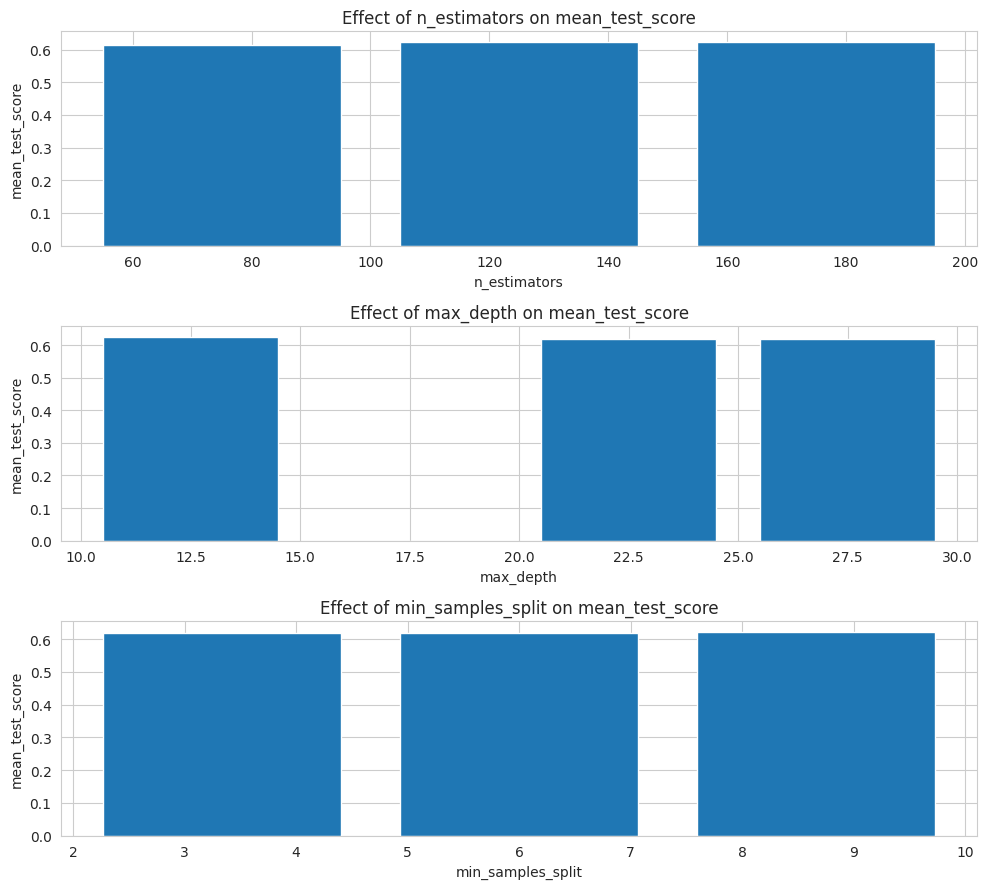

In [20]:
plot_hyperparameter_search_results(all_results, param_grid)

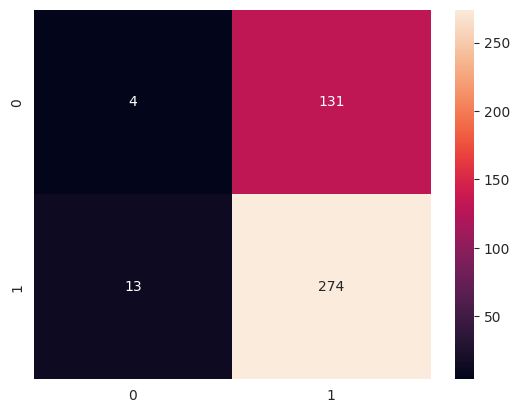

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Feature Selection

In [100]:
import json
with open('good_genes_missense.txt') as f:
    ordered_genes = json.load(f)

In [101]:
N = 100
good_genes = ordered_genes[:N]

In [102]:
X_train_good = X_train[good_genes]
X_val_good = X_val[good_genes]
X_test_good = X_test[good_genes]

In [109]:
model = RandomForestClassifier(n_estimators=200, max_depth=5)
model.fit(X_train_good, y_train)
model.score(X_val_good, y_val)

0.6460807600950119

In [110]:
model.score(X_train_good, y_train)

0.6493467933491687

In [95]:
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.5510688836104513

# CCLE

In [22]:
csv_file = 'data/CCLE_labels.csv'
df = pd.read_csv(csv_file)
df.head()

,Variant_Classification,MAD1L1..ENSG00000002822.,ITGA3..ENSG00000005884.,MYH13..ENSG00000006788.,GAS7..ENSG00000007237.,REV3L..ENSG00000009413.,TSPAN9..ENSG00000011105.,RNF216..ENSG00000011275.,CEP68..ENSG00000011523.,BRCA1..ENSG00000012048.,...,BGLAP..ENSG00000242252.,MICAL3..ENSG00000243156.,FMN1..ENSG00000248905.,GATC..ENSG00000257218.,CUX1..ENSG00000257923.,BAHCC1..ENSG00000266074.,PRAG1..ENSG00000275342.,UHRF1..ENSG00000276043.,is_true,mutation
0,1__639V_URINARY_TRACT_Missense_Mutation_c.(742...,3102,8389,0,3,3104,1698,5130,1687,4486,...,9,8144,3539,2944,6288,3160,140,23040,False,Missense_Mutation
1,1__BL41_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Mis...,5645,312,0,14,4925,35,4856,1110,10004,...,33,8346,40,4463,23703,133,4115,38105,False,Missense_Mutation
2,1__CA46_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Mis...,6967,2113,0,113,8180,115,3648,2871,7615,...,34,6574,234,4132,18149,265,1580,4790,False,Missense_Mutation
3,1__CAL29_URINARY_TRACT_Missense_Mutation_c.(84...,1882,24720,0,41,1809,1731,4349,759,2988,...,9,4380,1202,2996,19658,924,3914,10313,False,Missense_Mutation
4,1__CI1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Miss...,3139,1444,0,619,4744,25,6039,1757,12484,...,14,6447,44,3915,4945,25,4066,20850,False,Missense_Mutation


In [23]:
from classification import log_and_normalize
from copy import deepcopy

df = log_and_normalize(df)
df_full = df

## True vs False

In [24]:
df = deepcopy(df_full)
df = df.drop(columns=['is_true', 'mutation', 'Variant_Classification'])
y = df_full['is_true']

In [25]:
(y == 0).sum() / len(y)

0.6742424242424242

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [27]:
from classification import hyperparameter_search, plot_hyperparameter_search_results
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
best_model, best_params, best_score, all_results = hyperparameter_search(model, X_train, y_train, X_val, y_val,
                                                                         param_grid, search_type='grid', cv=3,
                                                                         verbose=2)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Validation Score with best hyperparameters: 0.6956521739130435


In [28]:
best_score

0.6576204426011872

In [29]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"Test accuracy of best model: {accuracy_score(y_test, y_pred):.2f}")

Test accuracy of best model: 0.62


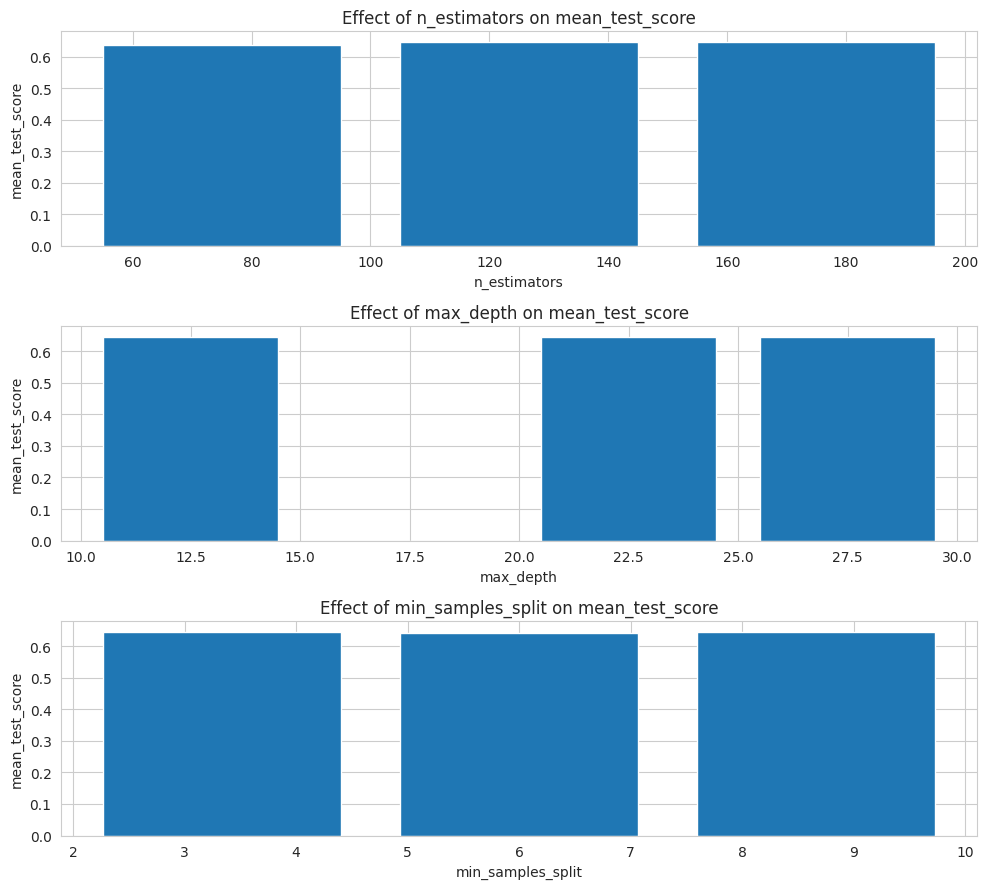

In [30]:
plot_hyperparameter_search_results(all_results, param_grid)
plt.show()

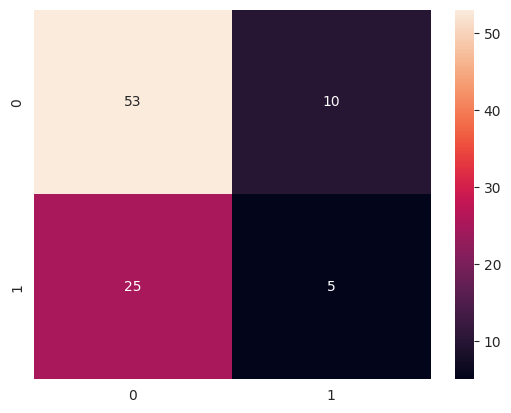

In [31]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Mutation prediction

In [32]:
df = deepcopy(df_full)
df = df.drop(columns=['is_true', 'mutation', 'Variant_Classification'])
y = df_full['mutation']

In [33]:
y.value_counts() / len(y)

mutation
Missense_Mutation    0.653680
Nonsense_Mutation    0.111472
Splice_Site          0.110390
Frame_Shift_Del      0.080087
Frame_Shift_Ins      0.023810
In_Frame_Del         0.017316
In_Frame_Ins         0.003247
Name: count, dtype: float64

In [34]:
y = y.apply(lambda x: 1 if x == 'Missense_Mutation' else 0)
y.value_counts() / len(y)

mutation
1    0.65368
0    0.34632
Name: count, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [36]:
from classification import hyperparameter_search, plot_hyperparameter_search_results
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
best_model, best_params, best_score, all_results = hyperparameter_search(model, X_train, y_train, X_val, y_val,
                                                                         param_grid, search_type='grid', cv=3,
                                                                         verbose=2)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   2.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  10.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   5.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=  11.2s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   5.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   8.0s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   3.9s
[CV] END max_depth=10, min_samples_sp

In [37]:
best_score

0.6400601252976094

In [38]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"Test accuracy of best model: {accuracy_score(y_test, y_pred):.2f}")

Test accuracy of best model: 0.57


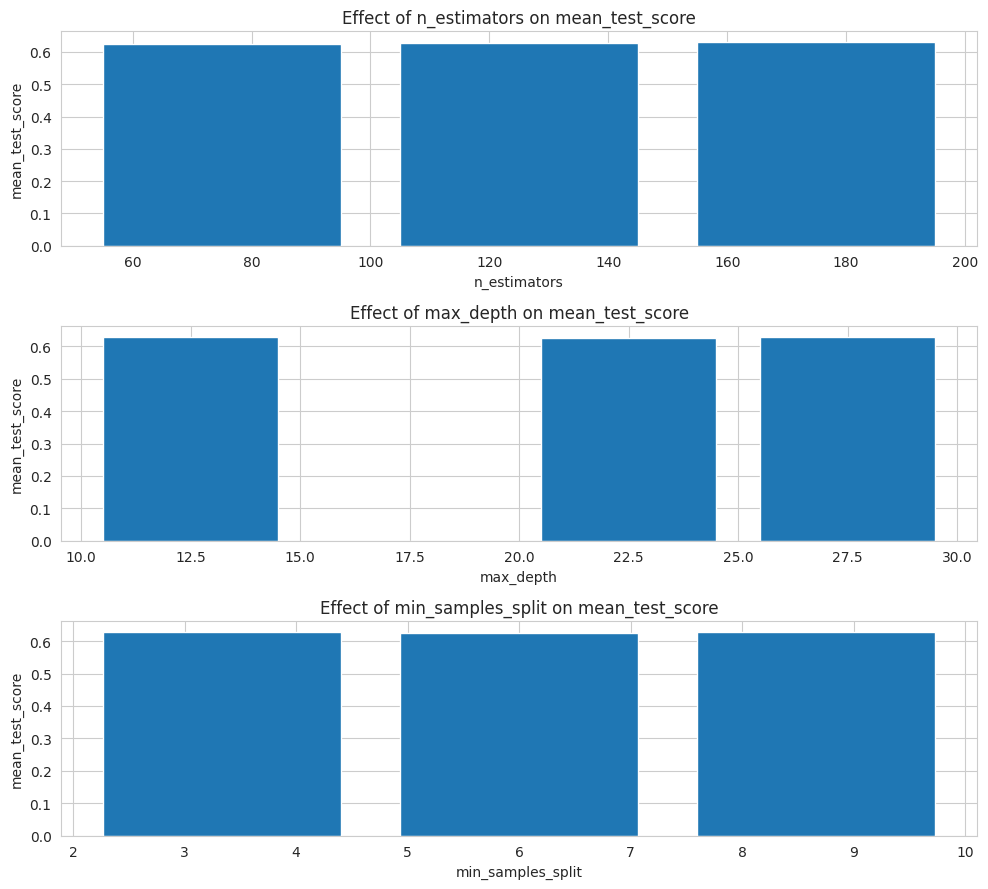

In [39]:
plot_hyperparameter_search_results(all_results, param_grid)

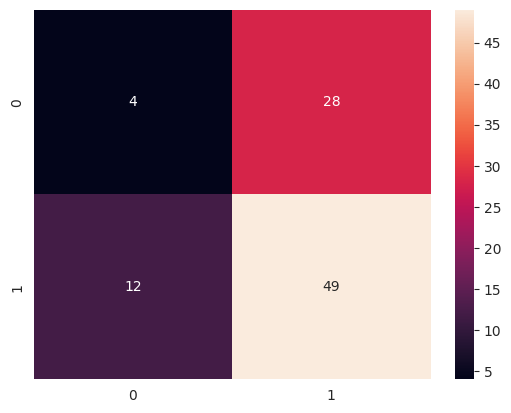

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()